In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm 

In [2]:
J = -1
B = 2.

In [3]:
# Definiendo el array inicial

def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))

In [4]:
N = 10
M = 10
sigma = random_spin_field(N,M)
print(sigma)

[[ 1 -1 -1 -1 -1  1  1  1 -1 -1]
 [ 1  1  1 -1 -1  1 -1 -1  1 -1]
 [ 1  1 -1 -1 -1  1  1  1  1 -1]
 [-1  1  1  1  1 -1  1 -1  1  1]
 [-1 -1  1 -1 -1 -1 -1  1 -1 -1]
 [-1  1  1 -1  1 -1 -1 -1  1  1]
 [-1  1  1 -1 -1  1  1  1 -1 -1]
 [ 1 -1 -1 -1 -1 -1  1  1  1  1]
 [-1  1  1 -1 -1  1  1 -1 -1  1]
 [-1 -1  1  1 -1 -1 -1  1 -1 -1]]


In [5]:
def GetEnergy(sigma):
    
    n = sigma.shape[0]
    m = sigma.shape[1]
    
    energy = 0.
     
    for i in range(n):
        for j in range(m):
            
            right = i+1
            if i == n-1:
                right = 0
                
            left = i-1
           
            up = j+1
            if j == m-1:
                up = 0
                
            down = j-1
            
            energy += 0.5*J*sigma[i,j]*\
            (sigma[right,j]+sigma[left,j]+sigma[i,up]+sigma[i,down])
    
    return energy

In [6]:
def GetMagnetization(sigma):
    return np.sum(sigma.ravel())/float(M*N)

In [7]:
print(GetEnergy(sigma), GetMagnetization(sigma))

(4.0, -0.06)


In [8]:
# Implementamos metropolis

def _ising_step(sigma, T):
    
    beta = 1./T
    
    current = sigma.copy()
    energy1 = GetEnergy(current)
    
    # Calcular una posición en el array
    x = randint(0,sigma.shape[0]-1)
    y = randint(0,sigma.shape[1]-1)
    
    future = current.copy()
    future[x,y] = current[x,y]*(-1)
    
    energy2 = GetEnergy(future)
    
    dE = energy2-energy1
    
    r =  np.random.rand()   
    
    if dE < 0.:
        return future
        
    elif r < np.exp(- dE * beta):
        return future
    
    else:
        return current

In [9]:
Energy = []
Energy2 = []
Magnetization = []

T = 2.0
Ntoys = 20000

sigma_ = sigma.copy()

for i in tqdm(range(Ntoys)):
    sigma_ = _ising_step(sigma_,T)
    
    if i >= 5000:
        energy = GetEnergy(sigma_)
        magnetization = GetMagnetization(sigma_)
        
        Energy.append(energy)
        Energy2.append(energy**2)
        Magnetization.append(magnetization)

100%|██████████| 20000/20000 [00:08<00:00, 2261.44it/s]


In [10]:
e = np.average(Energy)
e2 = np.average(Energy2)
m = np.average(Magnetization)

cv = (e2 - e**2)/(T**2)

print(e/float(M*N),m,cv/float(M*N))

(-1.7519413333333334, 0.9198173333333334, 0.689949780622228)


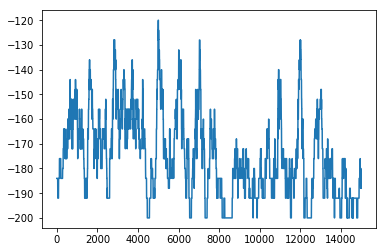

In [11]:
plt.figure()
plt.plot(Energy)

(array([1375., 2700., 3032., 2536., 2062., 1607.,  863.,  509.,  205.,
         111.]),
 array([-200., -192., -184., -176., -168., -160., -152., -144., -136.,
        -128., -120.]),
 <a list of 10 Patch objects>)

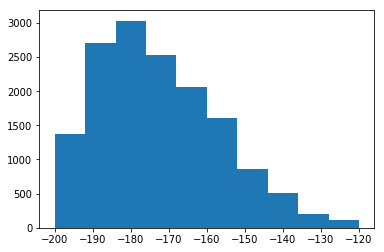

In [12]:
plt.figure()
plt.hist(Energy, bins=10)

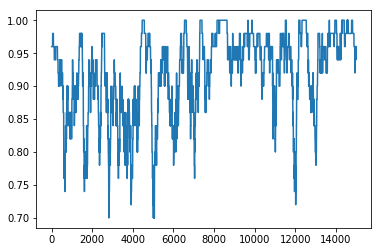

In [13]:
plt.figure()
plt.plot(Magnetization)

(array([  65.,   89.,  487.,  486., 1252.,  823., 2335., 1486., 4239.,
        3738.]),
 array([0.7 , 0.73, 0.76, 0.79, 0.82, 0.85, 0.88, 0.91, 0.94, 0.97, 1.  ]),
 <a list of 10 Patch objects>)

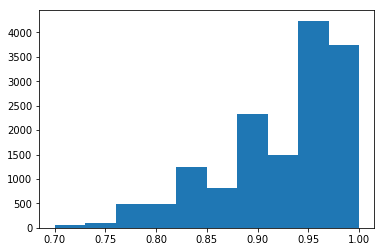

In [14]:
plt.figure()
plt.hist(Magnetization, bins=10)

In [15]:
# Ahora vamos a variar las temperaturas

def GetValues(T, Ntoys = 20000):
    
    sigma_ = sigma.copy()
    
    Energy = []
    Energy2 = []
    Magnetization = []
    
    for i in tqdm(range(Ntoys)):
   
        sigma_ = _ising_step(sigma_,T)

        if i >= 5000:
            energy = GetEnergy(sigma_)
            magnetization = GetMagnetization(sigma_)
            Energy.append(energy)
            Energy2.append(energy**2)
            Magnetization.append(magnetization)
            
    e = np.average(Energy)
    e2 = np.average(Energy2)
    m = np.average(Magnetization)

    cv = (e2 - e**2)/T**2   
    
    return e/float(M*N),np.abs(m),cv/float(M*N)   

In [16]:
T = np.arange(1.0,3.0,0.1)

Energy = np.zeros(len(T))
Mag = np.zeros(len(T))
Cv = np.zeros(len(T))

for t in range(len(T)):
    Energy[t], Mag[t], Cv[t] = GetValues(T[t])
    print(T[t], Energy[t], abs(Mag[t]), Cv[t])

  2%|▏         | 317/20000 [00:00<00:06, 3163.30it/s]

(1.0, -1.9975999999999998, 0.9994, 0.018624000000054364)


  2%|▏         | 307/20000 [00:00<00:06, 3066.84it/s]

(1.1, -1.9865573333333333, 0.9965586666666667, 0.097718020348953)


  1%|▏         | 285/20000 [00:00<00:06, 2842.87it/s]

(1.2000000000000002, -1.9872586666666665, 0.9966893333333333, 0.06831146469135596)


  1%|▏         | 293/20000 [00:00<00:06, 2927.95it/s]

(1.3000000000000003, -1.9724186666666665, 0.9927, 0.15162544683767679)


  2%|▏         | 318/20000 [00:00<00:06, 3173.68it/s]

(1.4000000000000004, -1.965288, 0.9904186666666668, 0.12387944163269907)


  2%|▏         | 321/20000 [00:00<00:06, 3206.64it/s]

(1.5000000000000004, -1.9625546666666667, 0.9900666666666668, 0.12649631162465078)


  2%|▏         | 321/20000 [00:00<00:06, 3204.56it/s]

(1.6000000000000005, -1.9286426666666667, 0.9789413333333334, 0.3401780330555366)


  2%|▏         | 333/20000 [00:00<00:05, 3323.26it/s]

(1.7000000000000006, -1.9175173333333333, 0.9770080000000001, 0.21166215800075672)


  1%|▏         | 298/20000 [00:00<00:06, 2978.87it/s]

(1.8000000000000007, -1.8614453333333332, 0.9570653333333334, 0.48573634809329114)


  1%|▏         | 268/20000 [00:00<00:07, 2672.52it/s]

(1.9000000000000008, -1.7675226666666666, 0.9219026666666668, 0.7997827189165961)


  2%|▏         | 320/20000 [00:00<00:06, 3198.05it/s]

(2.000000000000001, -1.785248, 0.9293760000000001, 0.619738129066672)


  2%|▏         | 319/20000 [00:00<00:06, 3186.85it/s]

(2.100000000000001, -1.651688, 0.8715866666666667, 0.8899973693726356)


  2%|▏         | 317/20000 [00:00<00:06, 3165.94it/s]

(2.200000000000001, -1.5697626666666666, 0.2720600000000001, 1.3350688086684974)


  2%|▏         | 325/20000 [00:00<00:06, 3244.46it/s]

(2.300000000000001, -1.4576133333333334, 0.2046453333333334, 1.6195883520268755)


  2%|▏         | 312/20000 [00:00<00:06, 3114.30it/s]

(2.4000000000000012, -1.2876026666666667, 0.31388000000000005, 1.1484576295061706)


  2%|▏         | 302/20000 [00:00<00:06, 3017.92it/s]

(2.5000000000000013, -1.1598773333333334, 0.43301466666666666, 0.9754655725795531)


  1%|▏         | 265/20000 [00:00<00:07, 2645.50it/s]

(2.6000000000000014, -0.9843386666666666, 0.21489733333333333, 0.667098263879028)


  2%|▏         | 326/20000 [00:00<00:06, 3257.13it/s]

(2.7000000000000015, -0.9909893333333334, 0.23056533333333334, 0.5976725361621693)


  1%|▏         | 299/20000 [00:00<00:06, 2982.00it/s]

(2.8000000000000016, -0.9870266666666667, 0.011079999999999987, 0.8779307732426281)


100%|██████████| 20000/20000 [00:08<00:00, 2335.26it/s]

(2.9000000000000017, -0.9439493333333333, 0.15558133333333335, 0.6425541351512762)


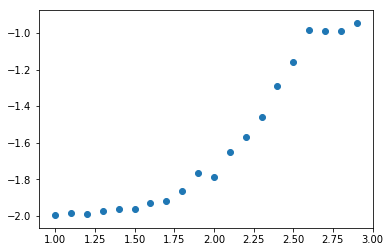

In [17]:
plt.figure()
plt.scatter(T,Energy)

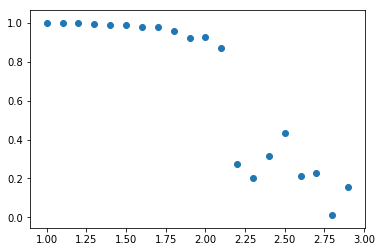

In [18]:
plt.figure()
plt.scatter(T,Mag)

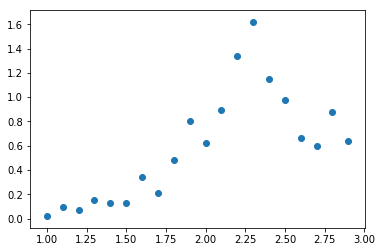

In [19]:
plt.figure()
plt.scatter(T,Cv)